instalujemy bibliotekę bs ktora odpowiada za parsowanie (def parsowania) htmla z podanego adresu internetowego

In [1]:
pip install "ipython-beautifulsoup[bs4]"

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


imp requests ktora jest odpowiedzialna za pobieranie htmla z podanego adrsu int
imp bibl bs4 ktora jest odpowiedzialna za parsowanie htmla

In [4]:
import requests
import bs4

pobieramy dane w postaci htmla z adresu empik.com i printujemy output data

In [17]:
response = requests.get('https://www.empik.com/bestsellery')
print(response.text)


<!DOCTYPE html>
<html lang="pl">
<head>
<script>
            !function(){if('PerformanceLongTaskTiming' in window){var g=window.__tti={e:[]};
            g.o=new PerformanceObserver(function(list) {
                const entries = list.getEntries();

                g.e=g.e.concat(
                    entries.filter(function(entry) {
                        return entry.entryType === 'longtask';
                    })
                );

                entries
                    .filter(function(entry) {
                        return entry.entryType !== 'longtask';
                    })
                    .forEach(function(entry) {
                        dataLayer.push({
                            event: 'pageSpeedData',
                            data: {
                                name: entry.name,
                                time: Math.round(entry.startTime + entry.duration),
                            }
                        });
                    });
         

parsujemy output data, co pozwoli nam na przegladanie htmla za pomoca funkcji biblioteki bs4 
prettify printuje output m.in z tabulacja, czyli 'upiększa' wydruk, dzieki temu wiemy ktore elementy są "dziećmi" innych elementów

In [18]:
soup = bs4.BeautifulSoup(response.text, "html.parser")
print(soup.prettify()) # Print the output using the 'prettify' function

<!DOCTYPE html>
<html lang="pl">
 <head>
  <script>
   !function(){if('PerformanceLongTaskTiming' in window){var g=window.__tti={e:[]};
            g.o=new PerformanceObserver(function(list) {
                const entries = list.getEntries();

                g.e=g.e.concat(
                    entries.filter(function(entry) {
                        return entry.entryType === 'longtask';
                    })
                );

                entries
                    .filter(function(entry) {
                        return entry.entryType !== 'longtask';
                    })
                    .forEach(function(entry) {
                        dataLayer.push({
                            event: 'pageSpeedData',
                            data: {
                                name: entry.name,
                                time: Math.round(entry.startTime + entry.duration),
                            }
                        });
                    });
            });


pobieramy element title z parsowanego htmla. title jest tylko jeden i wyswietla sie na samej gorze strony 

In [19]:
soup.title

<title>Bestsellery - 100 najlepiej sprzedających się produktów - EMPIK.COM</title>

wyswietlamy sama zawartość elementu title (the content of the string)

In [87]:
soup.title.string

'Bestsellery - 100 najlepiej sprzedających się produktów - EMPIK.COM'

pobieramy pierwszy element 'p' (paragraf) z parsowanego htmla

In [21]:
# Access data in the first 'p' tag
soup.p

<p class="search-mobile__numFound hidden-md hidden-lg">
100 produktów
</p>

pobieramy pierwszy element 'a' (anchor, czyli link) z parsowanego htmla

In [22]:
# Access data in the first 'a' tag
soup.a

<a class="first-link" href="https://www.empikfoto.pl/?utm_source=empik.com&amp;utm_medium=menu&amp;utm_campaign=empik.com" target="_blank" title="empikfoto.pl"> <span>empikfoto.pl</span> </a>

pobieramy wszystkie anchory (linki) z dokumentu. Funkcja find_all returns an array

In [24]:
# Retrieve all links in the document (note it returns an array)
soup.find_all('a')

[<a class="first-link" href="https://www.empikfoto.pl/?utm_source=empik.com&amp;utm_medium=menu&amp;utm_campaign=empik.com" target="_blank" title="empikfoto.pl"> <span>empikfoto.pl</span> </a>,
 <a class="el-1" href="https://empikbilety.pl/?utm_source=empik.com&amp;utm_medium=top" target="_blank" title="empikbilety.pl"> <span>empikbilety.pl</span> </a>,
 <a class="el-2" href="/go" title="EmpikGO"> <span>EmpikGO</span> </a>,
 <a class="el-3" href="/music" title="Empik Music"> <span>Empik Music</span> </a>,
 <a class="el-4" href="https://www.papiernikbyempik.com" target="_blank" title="Papiernik"> <span>Papiernik</span> </a>,
 <a class="el-5" href="/pomoc/kontakt" title="Kontakt"> <span>Kontakt</span> </a>,
 <a class="el-6" href="/pomoc" title="Pomoc"> <span>Pomoc</span> </a>,
 <a class="el-7" href="/biznes" title="Biznes"> <span>Biznes</span> </a>,
 <a class="el-8" href="/app/promocja" title="Aplikacja mobilna"> <span>Aplikacja mobilna</span> </a>,
 <a class="el-9" href="/pasje" title="

pobieramy wszystkie elementy ktore maja klasę o nazwie premium

In [37]:
# Retrieve elements by class equal to link using the attributes argument
soup.findAll(attrs={'class' : 'premium'})

[<div class="productBox__badgePremiumWithFree premium ta-premium-label search-list-item__lp-benefit">
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img></div>,
 <div class="productBox__badgePremiumWithFree premium ta-premium-label search-list-item__lp-benefit">
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img></div>,
 <div class="productBox__badgePremiumWithFree premium ta-premium-label search-list-item__lp-benefit">
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img></div>,
 <div class="productBox__badgePremiumWithFree premium ta-premium-label search-list-item__lp-benefit">
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_

pobieramy element który ma id o nazwie main...

In [39]:
soup.find(id="main-nav-desktop-trigger")

<div class="empikNav__menu-desktop-trigger" id="main-nav-desktop-trigger">
<div class="empikNav__menu-icon"></div>
<div class="empikNav__text">
Wszystkie kategorie
<i aria-hidden="true" class="fa fa-angle-down"></i>
</div>
</div>

pobieramy wszystkie elementy, ktore maja atrybut src (source) równy b/mp...

In [92]:
soup.findAll(attrs={'src':'/b/mp/img/svg/premium/premium_badge.svg'})

[<img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg">
 <span class="premiumText js_premiumText ta-premium-label-text">dostawa i odbiór 0 zł</span>
 </img>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg"/>,
 <img class="svgBadge" src="/b/mp/img/svg/premium/premium_badge.svg"

pobieramy wszystkie elementy ktore są nav (navbar) 

In [91]:
# 
soup.find_all('nav')

[<nav class="empikNav">
 <div class="empikNav__menu-desktop-trigger" id="main-nav-desktop-trigger">
 <div class="empikNav__menu-icon"></div>
 <div class="empikNav__text">
 Wszystkie kategorie
 <i aria-hidden="true" class="fa fa-angle-down"></i>
 </div>
 </div>
 <div class="empikNav__menu-mobile-trigger--open" data-box-type="menu" id="main-nav-mobile-trigger-open">
 <div class="empikNav__menu-icon"></div>
 </div>
 <div class="empikNav__menu-desktop">
 <div class="main-nav" data-box-type="menu">
 <ul class="main-nav__categories nav-categories">
 <li class="nav-categories__item menu-hot-phrase">
 <a class="nav-categories__link js-menu-hot-phrase__link" data-id="38431001" href="/zdrowie-i-uroda/opalanie/ochrona-przeciwsloneczna,38431001,s" title="Ochrona przeciwsłoneczna">Ochrona przeciwsłoneczna</a>
 </li>
 <li class="nav-categories__item menu-hot-phrase">
 <a class="nav-categories__link js-menu-hot-phrase__link" data-id="3161" href="/ksiazki/kuchnia-i-diety" title="Kuchnia i diety">Kuchn

pobieramy wszystkie elementy z klasą product-de... Następnie pobieramy z tych elementow element z tytulem. Następnie każdy element z tytulem zamieniamy na tekst znajdujący się w tym elemencie ale nie jego "dzieciach" (text=True, recursive=False). Zamieniamy w tekście znak nowej linii na pusty string. printujemy tablicę tytułów bez elementów htmlowskich

In [89]:
data = soup.findAll(attrs={'class':'product-details-wrapper ta-details-box'})
# find all the tags with class city or number
titles = [el.find(attrs={'class':'ta-product-title'}) for el in data]
titles = [el.find(text=True, recursive=False).replace('\n', '') for el in titles]
# print 'data' to console
print(titles)

['PlayStation Plus - 12 miesięcy', 'Czuła przewodniczka. Kobieca droga do siebie', 'Chechło', 'Zaginiona siostra. Siedem sióstr', 'Wyzwolony. Nowe oblicze Greya oczami Christiana', 'Xiaomi, Mi Band 5, czarny', 'Szkoła bohaterek i bohaterów, czyli jak radzić sobie z życiem', 'Terapeutka', 'Ekstremista', 'Xiaomi, Smartwatch, Mi Smart Band 6, czarny', 'Jesteś ważny, Pinku! Książka o poczuciu własnej wartości dla dzieci i dla rodziców trochę też', 'Dobrostan. O szczęśliwym, bogatym i spełnionym życiu', 'Informacja zwrotna', 'Google Play 20 zł', 'Opóźnienie może ulec zmianie', 'Filtr do wody BRITA MicroDisc do butelek/karafek 1039628, 3 szt.', 'Statystycznie rzecz biorąc, czyli ile trzeba zjeść czekolady, żeby dostać Nobla?', 'Afryka Kazika', 'Gdy ciało i dusza wysyłają SOS. Jak przyczyny chorób odnaleźć w psychice?', 'Wojny i Noce', 'Nowe rozdanie', 'Czerwone krzesło. Magiczne drzewo. Tom 1', 'Nie wiesz nic', 'Potęga podświadomości', 'Cień i kość. Trylogia Grisza. Tom 1', 'Odzyskaj błysk w

pobieramy z elementów znajdących sie w zmiennej data elementy zawierające ceny pozycji, ktore nastepnie zamieniamy na text znajdujący się bezpośrednio w tych elementach, usuwamy za pomocą strip znaki nowej linii oraz zamieniamy znak \xa0zł na pusty string, nastepnie zamieniamy , na . i konwertujemy stringa na floata. 

In [90]:
prices = [el.find(attrs={'class':'price'}) for el in data]
prices = [float(el.find(text=True, recursive=False).strip().replace('\xa0zł', '').replace(',', '.')) for el in prices]
print(prices)

[240.0, 24.77, 26.46, 31.67, 26.58, 108.8, 24.64, 25.54, 24.76, 188.99, 20.1, 39.0, 26.84, 20.0, 25.03, 31.99, 22.43, 26.49, 31.18, 39.99, 15.48, 17.84, 32.18, 22.43, 26.0, 31.18, 49.99, 29.14, 31.77, 50.0]


importujemy biblioteke matplot ktora odpowiada za drukowanie wykresow. nastepnie tworzymy figure z ustalonymi wymiarami, tworzymy wyjres slupkowy z tytulami i cenami. Nastepnie ustalamy aby tytuły drukowaly sie pionowo oraz drukujmy wykres aby zobaczyc dystrybucje

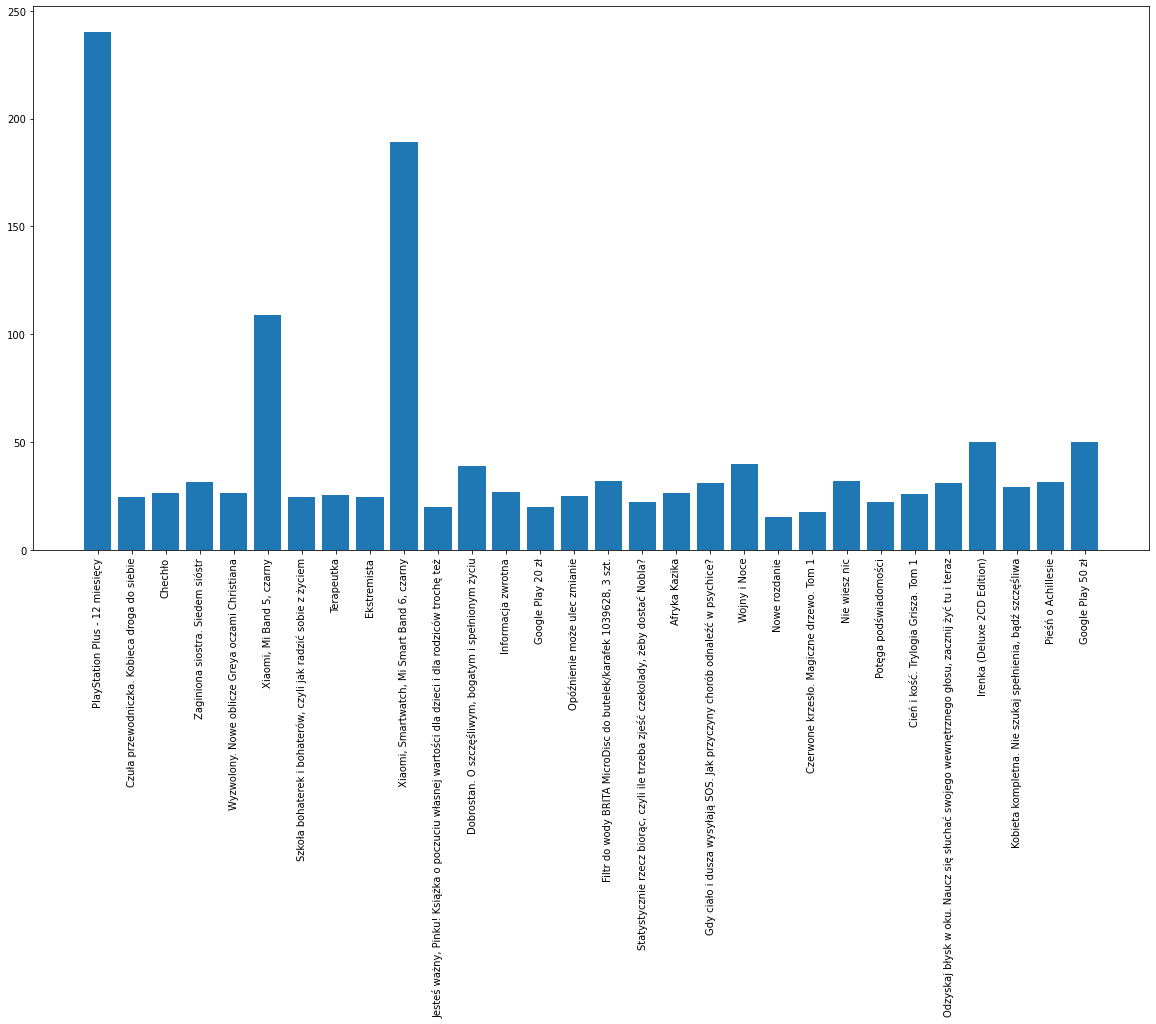

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(titles, prices)
plt.xticks(rotation=90)
plt.show()
